# 이동 분석

### 데이터

데이터는 총 26,048,114 행 13 열로 이루어져 있으며 전처리는 미리 해놓은 상태입니다. 유동인구의 변화를 알기 위하여 카드 이용지역과 고객 거주지역이 같은 데이터(같은 지역 고객)와 다른 데이터(타지역 고객)로 나누어 분석을 하겠습니다. 데이터는 미리 MATLAB을 통해 나누었습니다. 같은 지역 고객 데이터는 총 10,323,084 행 13 열로 이루어져 있으며, 타지역 고객 데이터는 총 15,725,030 행 13 열로 이루어져 있습니다.

### 변수 설명

REG_YYMM: 년월<br> 
CARD_SIDO_NM: 카드이용지역_시도 (가맹점 주소 기준)<br> 
CARD_CCG_NM: 카드 이용지역_시군구 (가맹점 주소 기준)<br> 
STD_CLSS_NM: 업종명<br> 
HOM_SIDO_NM: 거주지역_시도 (고객 집주소 기준)<br> 
HOM_CCG_NM: 거주지역_시군구 (고객 집주소 기준)<br> 
AGE: 연령대<br> 
SEX_CTGO_CD: 성별 (1: 남성, 2: 여성)<br> 
FLC: 가구생애주기 (1: 1인가구, 2:영유아자녀가구, 3: 중고생자녀가구, 4: 성인자녀가구, 5: 노년가구)<br> 
CSTMR_CNT: 이용고객수 (명)<br> 
AMT: 이용금액 (원)<br> 
CNT: 이용건수 (건)<br> 

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats

In [2]:
import os
os.name

if os.name == 'posix': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')

In [3]:
# Load Data

differentFile = "/Users/ChaeEun/Desktop/프로젝트/DifferentCity.csv"

sameFile = "/Users/ChaeEun/Desktop/프로젝트/SameCity.csv"

In [4]:
# Read Data

different = pd.read_csv(differentFile)

same = pd.read_csv(sameFile)


### 지역과 월별 이용건수와 이용금액

In [5]:
# 타지역 카드 사용 지역과 월별 그룹화

differentDate = different.groupby(by = ["CARD_SIDO_NM", "REG_YYMM"])

# 타지역 지역과 월별 이용건수 합

differentDateCNT = differentDate['CNT'].sum()

# 타지역 지역과 월별 이용금액 합

differentDateAMT = differentDate['AMT'].sum()

In [6]:
# 같은지역 카드 사용 지역과 월별 그룹화

sameDate = same.groupby(by = ["CARD_SIDO_NM", "REG_YYMM"])

# 같은지역 지역과 월별 이용건수 합

sameDateCNT = sameDate['CNT'].sum()

# 같은지역 지역과 월별 이용금액 합

sameDateAMT = sameDate['AMT'].sum()

## 강원

In [7]:
# 타지역 이용건수와 이용금액

DifferentCNT = differentDateCNT['강원']
DifferentAMT = differentDateAMT['강원']

# 같은지역 이용건수와 이용금액

SameCNT = sameDateCNT['강원']
SameAMT = sameDateAMT['강원']

# 타지역과 같은지역 비율

CNTratio = SameCNT/DifferentCNT
AMTratio = SameAMT/DifferentAMT

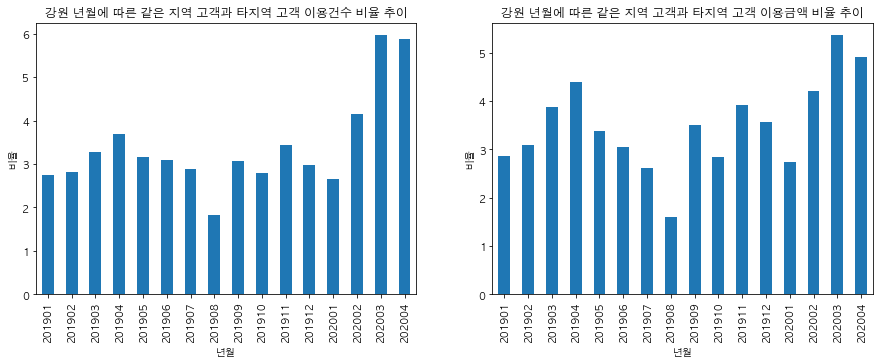

In [8]:
# 이용건수와 이용금액 시각화

plt.figure(figsize = (15, 5))
plt.subplot(1, 2, 1)

CNTratio.plot.bar()
plt.xlabel('년월')
plt.ylabel('비율')
plt.title('강원 년월에 따른 같은 지역 고객과 타지역 고객 이용건수 비율 추이')

plt.subplot(1, 2, 2)

AMTratio.plot.bar()
plt.xlabel('년월')
plt.ylabel('비율')
plt.title('강원 년월에 따른 같은 지역 고객과 타지역 고객 이용금액 비율 추이')

plt.show()

In [9]:
# 코로나 전후 비교 (2019년 1월~4월, 2020년 1월~4월)

# 2019년 1월~4월, 2020년 1월~4월 이용건수 합 데이터 추출
SameCNT2019 = SameCNT.loc['201901':'201904']
SameCNT2020 = SameCNT.loc['202001':'202004']

DifferentCNT2019 = DifferentCNT.loc['201901':'201904']
DifferentCNT2020 = DifferentCNT.loc['202001':'202004']

# 2019년 1월~4월, 2020년 1월~4월 이용금액 합 데이터 추출
SameAMT2019 = SameAMT.loc['201901':'201904']
SameAMT2020 = SameAMT.loc['202001':'202004']

DifferentAMT2019 = DifferentAMT.loc['201901':'201904']
DifferentAMT2020 = DifferentAMT.loc['202001':'202004']

In [10]:
# 2019년 1월~4월, 2020년 1월~4월 이용금액 차이

SameAMTdifferenceValue = SameAMT2019.values - SameAMT2020.values
SameAMTdifferenceDF = {'REG_YYMM': [201901, 201902, 201903, 201904], '강원': SameAMTdifferenceValue}
SameAMTdifference = pd.DataFrame(SameAMTdifferenceDF, columns = ['REG_YYMM', '강원'])

DifferentAMTdifferenceValue = DifferentAMT2019.values - DifferentAMT2020.values
DifferentAMTdifferenceDF = {'REG_YYMM': [201901, 201902, 201903, 201904], '강원': DifferentAMTdifferenceValue}
DifferentAMTdifference = pd.DataFrame(DifferentAMTdifferenceDF, columns = ['REG_YYMM', '강원'])

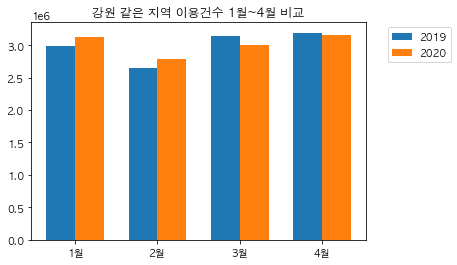

In [11]:
# 2019년 1월~4월, 2020년 1월~4월 같은 지역 이용건수 비교 시각화

fig, ax = plt.subplots()

N = 4
ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, SameCNT2019, width)

p2 = ax.bar(ind + width, SameCNT2020, width)

ax.set_title('강원 같은 지역 이용건수 1월~4월 비교')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('1월', '2월', '3월', '4월'))

ax.legend((p1[0], p2[0]), ('2019', '2020'), bbox_to_anchor=(1.05, 1))

plt.show()

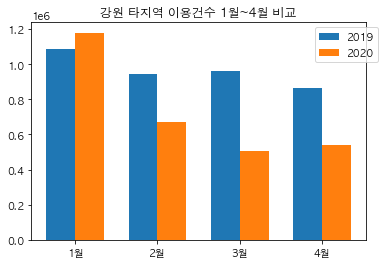

In [12]:
# 2019년 1월~4월, 2020년 1월~4월 타지역 이용건수 비교 시각화

fig, ax = plt.subplots()

N = 4
ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, DifferentCNT2019, width)

p2 = ax.bar(ind + width, DifferentCNT2020, width)

ax.set_title('강원 타지역 이용건수 1월~4월 비교')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('1월', '2월', '3월', '4월'))

ax.legend((p1[0], p2[0]), ('2019', '2020'), bbox_to_anchor=(1.05, 1))

plt.show()

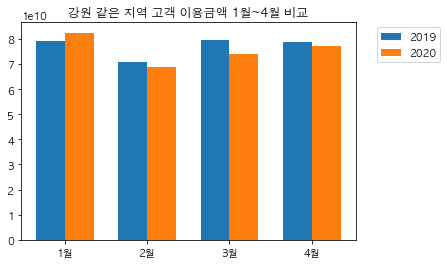

In [13]:
# 2019년 1월~4월, 2020년 1월~4월 같은 지역 이용금액 비교 시각화

fig, ax = plt.subplots()

N = 4
ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, SameAMT2019, width)

p2 = ax.bar(ind + width, SameAMT2020, width)

ax.set_title('강원 같은 지역 고객 이용금액 1월~4월 비교')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('1월', '2월', '3월', '4월'))

ax.legend((p1[0], p2[0]), ('2019', '2020'), bbox_to_anchor=(1.05, 1))

plt.show()

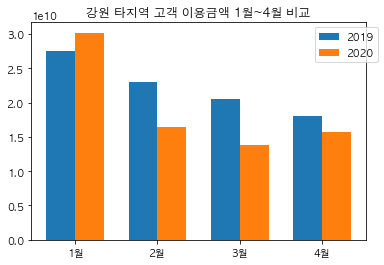

In [14]:
# 2019년 1월~4월, 2020년 1월~4월 타지역 이용금액 비교 시각화

fig, ax = plt.subplots()

N = 4
ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, DifferentAMT2019, width)

p2 = ax.bar(ind + width, DifferentAMT2020, width)

ax.set_title('강원 타지역 고객 이용금액 1월~4월 비교')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('1월', '2월', '3월', '4월'))

ax.legend((p1[0], p2[0]), ('2019', '2020'), bbox_to_anchor=(1.05, 1))

plt.show()

In [15]:
# 이용금액 Sample T-test 실행

# 2019년 1~4월, 2020년 1~4월 이용금액 T-test

SameAMTttest = stats.ttest_ind(SameAMT2019.values, SameAMT2020.values)
DifferentAMTttest = stats.ttest_ind(DifferentAMT2019.values, DifferentAMT2020.values)

# 2019년 2월~4월, 2020년 2월~4월 이용건수 합 데이터 추출

SameAMT2019_2 = SameAMT.loc['201902':'201904']
SameAMT2020_2 = SameAMT.loc['202002':'202004']

DifferentAMT2019_2 = DifferentAMT.loc['201902':'201904']
DifferentAMT2020_2 = DifferentCNT.loc['202002':'202004']

# 2019년 2~4월, 2020년 2~4월 이용금액 T-test

SameAMTttest_2 = stats.ttest_ind(SameAMT2019_2.values, SameAMT2020_2.values)
DifferentAMTttest_2 = stats.ttest_ind(DifferentAMT2019_2.values, DifferentAMT2020_2.values)

print("2019년 1월~4월과 2020년 1월~4월 같은 지역 고객의 이용금액 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %SameAMTttest)
print("2019년 1월~4월과 2020년 1월~4월 타지역 고객의 이용금액 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %DifferentAMTttest)
print("2019년 2월~4월과 2020년 2월~4월 같은 지역 고객의 이용금액 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %SameAMTttest_2)
print("2019년 2월~4월과 2020년 2월~4월 타지역 고객의 이용금액 t-statistics 값은 %.3f 이며, p-value는 %.3f 입니다." %DifferentAMTttest_2)


2019년 1월~4월과 2020년 1월~4월 같은 지역 고객의 이용금액 t-statistics 값은 0.368 이며, p-value는 0.726 입니다.
2019년 1월~4월과 2020년 1월~4월 타지역 고객의 이용금액 t-statistics 값은 0.752 이며, p-value는 0.481 입니다.
2019년 2월~4월과 2020년 2월~4월 같은 지역 고객의 이용금액 t-statistics 값은 0.768 이며, p-value는 0.485 입니다.
2019년 2월~4월과 2020년 2월~4월 타지역 고객의 이용금액 t-statistics 값은 14.298 이며, p-value는 0.000 입니다.


위와 같은 방법으로 17개 시도 분석을 실행하였습니다.